# EXERCÍCIO 04
  ## Usando Métodos de Detecção de Anomalias Para um Conjunto de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
dados, rotulos = make_blobs(n_samples=200, centers=1, n_features=2, random_state=0, center_box=(10,10), cluster_std=0.3)

In [4]:
dados[:10]

array([[10.01372756,  9.94384484],
       [ 9.6188545 , 10.29081901],
       [ 9.88453606, 10.02830548],
       [ 9.84710435,  9.86857771],
       [ 9.81157373,  9.85569186],
       [ 9.96903434, 10.12317955],
       [ 9.74163229, 10.57301949],
       [10.01158917,  9.50298547],
       [10.23153717, 10.24705125],
       [10.04648423, 10.11344876]])

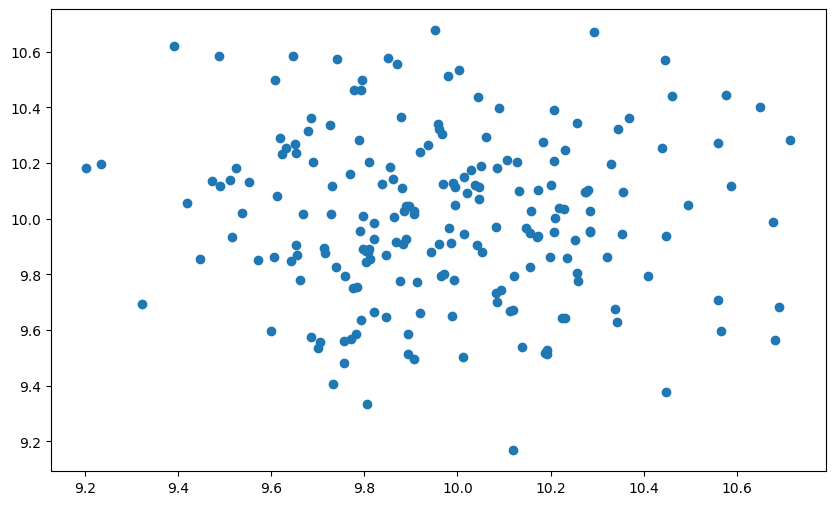

In [6]:
plt.scatter(dados[:,0], dados[:,1])
plt.show()

## Detecção de Anomalias Utilizando o Algoritmo Fator Local de Anomalia (LOF) - Método Algorítmico

In [7]:
k_vizinhos = 20
contaminacao = 0.03
lof = LocalOutlierFactor(n_neighbors=k_vizinhos, contamination=contaminacao)

In [8]:
predicao = lof.fit_predict(dados)

In [9]:
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
lof_indice = np.where(predicao == -1)
anomalias = dados[lof_indice]

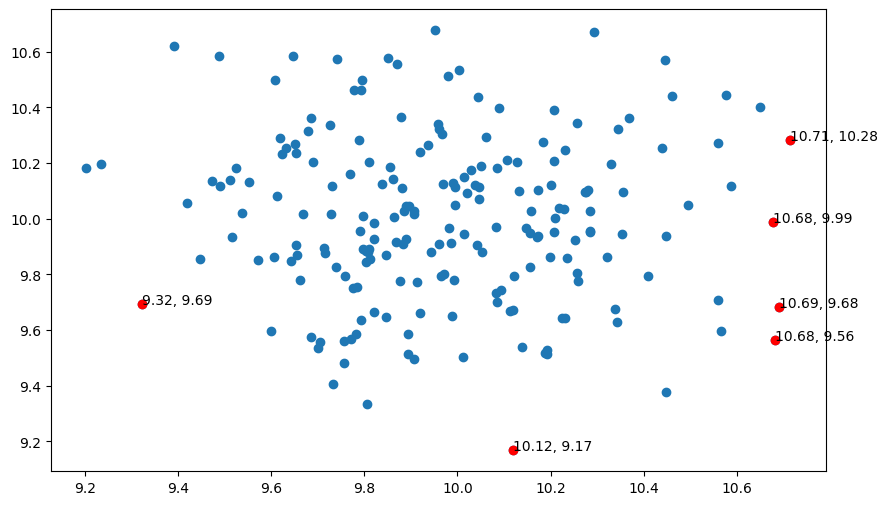

In [11]:
fig, eixo = plt.subplots()
eixo.scatter(dados[:,0], dados[:,1])
eixo.scatter(anomalias[:,0], anomalias[:,1], color="red")

for i, texto in enumerate(anomalias):
  eixo.annotate("{:.2f}".format(texto[0])+", "+"{:.2f}".format(texto[1]), (anomalias[i,0], anomalias[i,1]))

plt.show()

## Detecção de Anomalias Utilizando Métodos Estatísticos Não-Paramétricos

In [14]:
from sklearn.datasets import fetch_california_housing
import plotly.express as pe

In [15]:
dados_california = fetch_california_housing(as_frame=True)
moradia = dados_california.data
moradia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


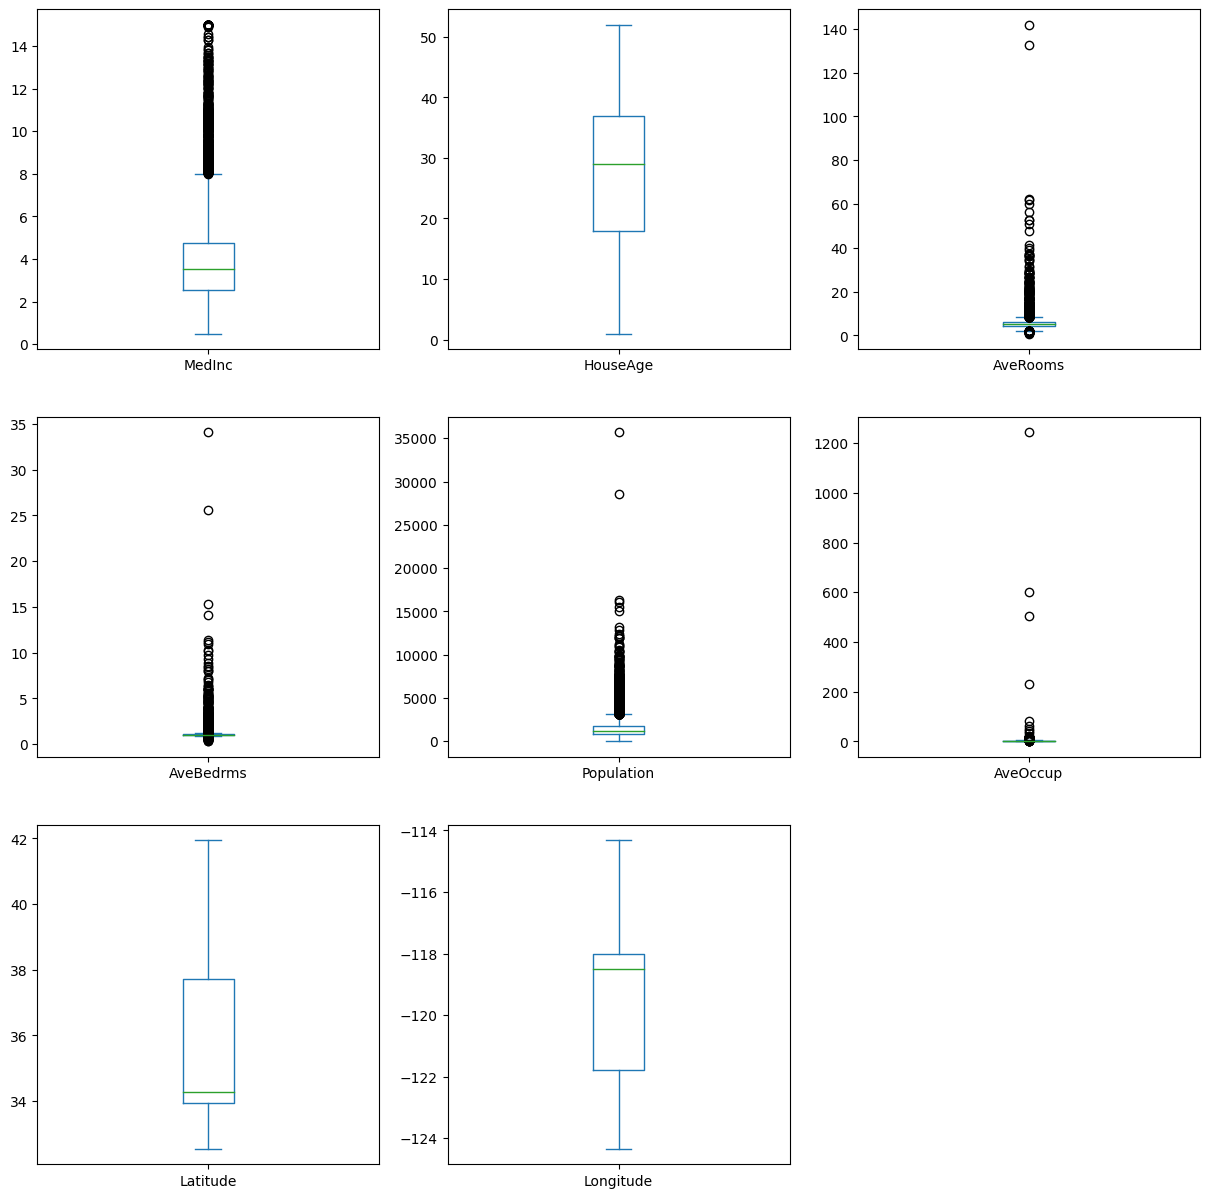

In [17]:
moradia.plot(kind="box", subplots=True, layout=(3,3), figsize=(15,15))
plt.show()

In [18]:
fig_renda = pe.histogram(moradia, x="MedInc", marginal="box")
fig_renda.show()

In [19]:
fig_ambientes = pe.histogram(moradia, x="AveRooms", marginal="box")
fig_ambientes.show()

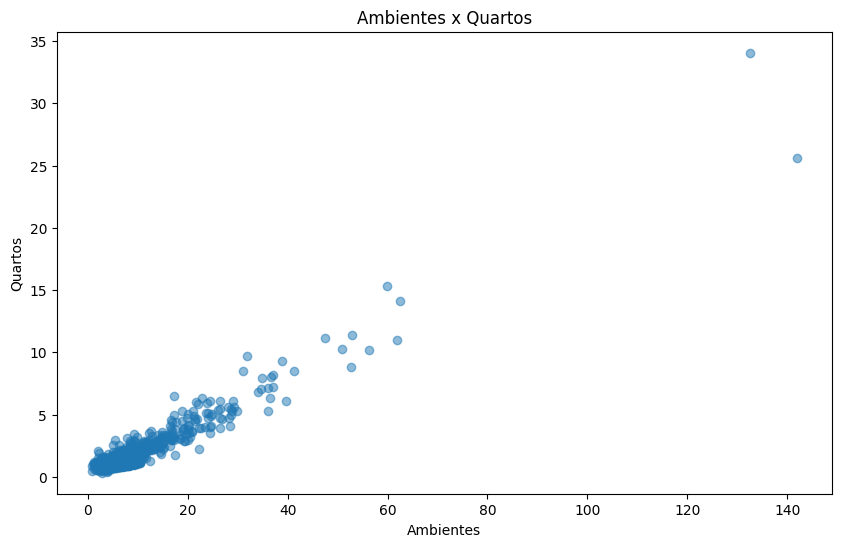

In [20]:
plt.scatter(moradia["AveRooms"], moradia["AveBedrms"], alpha=0.5)
plt.xlabel("Ambientes")
plt.ylabel("Quartos")
plt.title("Ambientes x Quartos")
plt.show()

In [21]:
populacao = moradia["Population"]
populacao.head()

0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: Population, dtype: float64

In [22]:
quartil1 = moradia["Population"].quantile(0.25)
quartil3 = moradia["Population"].quantile(0.75)
range_interquartil = quartil3 - quartil1
print(f"Q1: {quartil1}, Q3: {quartil3} e RI: {range_interquartil}")

Q1: 787.0, Q3: 1725.0 e RI: 938.0


In [23]:
sigma = 1.5
limite_inferior = quartil1 - (range_interquartil * sigma)
limite_superior = quartil3 + (range_interquartil * sigma)
print(f"Limite inferior: {limite_inferior}, Limite superior: {limite_superior}")

Limite inferior: -620.0, Limite superior: 3132.0


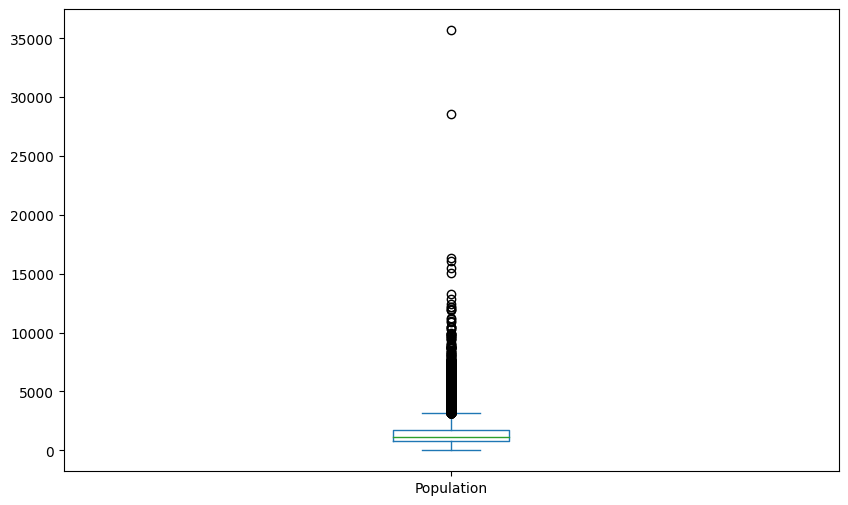

In [24]:
moradia["Population"].plot(kind="box")
plt.show()

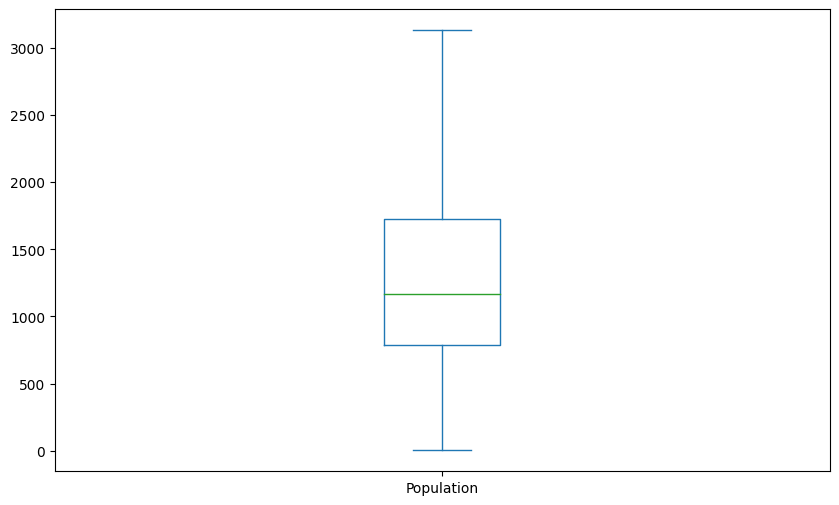

In [25]:
moradia["Population"].plot(kind="box",showfliers=False)
plt.show()